# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

Draw a dispersion diagram (scatter plot) for the data.

In [4]:
Age = [17,51,27,21,36,48,19,26,54,30]
Tardies = [10,1,5,9,4,2,9,6,0,3]

data = pd.DataFrame({'X': Age, 'Y': Tardies})
data


,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


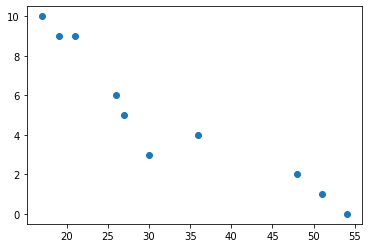

In [8]:
plt.figure()
plt.scatter(data['X'], data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
#I see a negative trend

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.
#correlation:
cor = data.corr()

#covariance:
cov = data.cov()

print(cor)
print(cov)

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


In [ ]:
#“Covariance” indicates the direction of the linear relationship between variables.
#“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
x = data['X']
y = data['Y']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print (slope)
print (intercept)

-0.24282077091598084
12.88880336313577


Plot your regression model on your scatter plot.

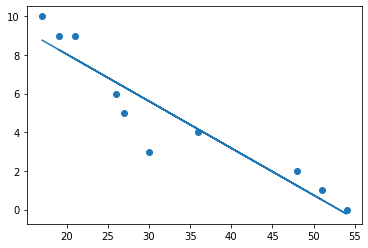

In [16]:
plt.figure()
plt.scatter(data['X'], data['Y'])
plt.plot(x, slope*x + intercept)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [19]:
print(p_value)
print(r_value*r_value)


5.56665383455336e-05
0.8820265558250112


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
newd = pd.read_csv('vehicles.csv')
newd.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

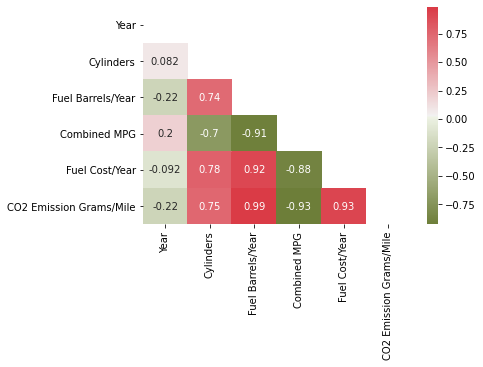

In [36]:
cor= newd[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

mask = np.triu(np.ones_like(cor, dtype=np.bool))

cmap = sns.diverging_palette(100, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, mask=mask, annot= True)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [38]:
Y = newd['CO2 Emission Grams/Mile']

X = newd[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

lm = LinearRegression()
model = lm.fit(X,Y)

print('Score (r-squared): ', lm.score(X,Y))

Score (r-squared):  0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coef

,Coefficient
Year,-0.320617
Cylinders,1.878800
Fuel Barrels/Year,19.052925
Combined MPG,-3.040399
Fuel Cost/Year,0.032309


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [40]:
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

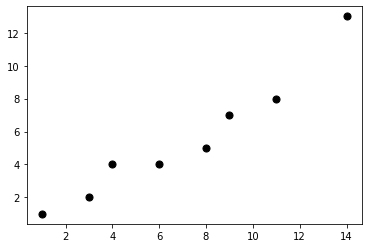

In [41]:
plt.scatter(X, Y, color='k', s=50)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Score (r-squared):  0.9316696375519905
Slope:  [0.84848485]


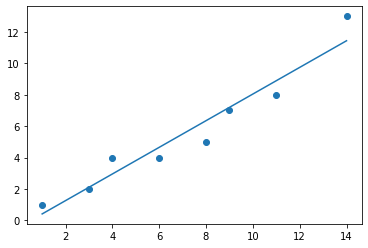

In [44]:
X = np.array(X).reshape(-1, 1)
lm = LinearRegression()
model = lm.fit(X,Y)

print('Score (r-squared): ', lm.score(X,Y))
print('Slope: ', lm.coef_)

plt.scatter(X, Y)
plt.plot(X, X*lm.coef_ + lm.intercept_,)
plt.show()


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

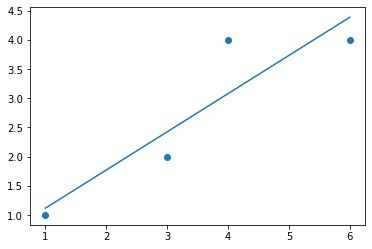

In [49]:
X = np.array(X[:-1]).reshape(-1, 1)
Y= Y[:-1]
lm = LinearRegression()
model = lm.fit(X,Y)

plt.scatter(X, Y)
plt.plot(X, X*lm.coef_ + lm.intercept_)
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?